In [1]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import math

In [2]:
twins = []

with open("./twins.txt", "r") as f:
    for line in f:
        nums = line.strip().split()
        if nums == []:
            continue
        nums = list(map(int, nums))
        twins += nums

In [8]:
N = 10
products = [3*5] * (N+1)
for i in range(1, N+1):
    products[i] = products[i - 1] * twins[2*i] * twins[2*i + 1]

for p in products:
    up, down = p+2, p-2
    print(f"{down} < {p} < {up}")

13 < 15 < 17
2803 < 2805 < 2807
3335143 < 3335145 < 3335147
13970922403 < 13970922405 < 13970922407
150983758430833 < 150983758430835 < 150983758430837
3082031460848634853 < 3082031460848634855 < 3082031460848634857
105371573614953977057593 < 105371573614953977057595 < 105371573614953977057597
4712111400487126900038590803 < 4712111400487126900038590805 < 4712111400487126900038590807
302946354048717875530381041444253 < 302946354048717875530381041444255 < 302946354048717875530381041444257
26474784826671503860475529592854888703 < 26474784826671503860475529592854888705 < 26474784826671503860475529592854888707
3849248390304249960786118674093950833486063 < 3849248390304249960786118674093950833486065 < 3849248390304249960786118674093950833486067


In [3]:
frequency = [0]*twins[-1]

for i in tqdm(range(1, len(twins))):
    for j in range(twins[i-1], twins[i]):
        frequency[j] = frequency[twins[i-1]-1] + 1

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/18409198 [00:00<?, ?it/s]

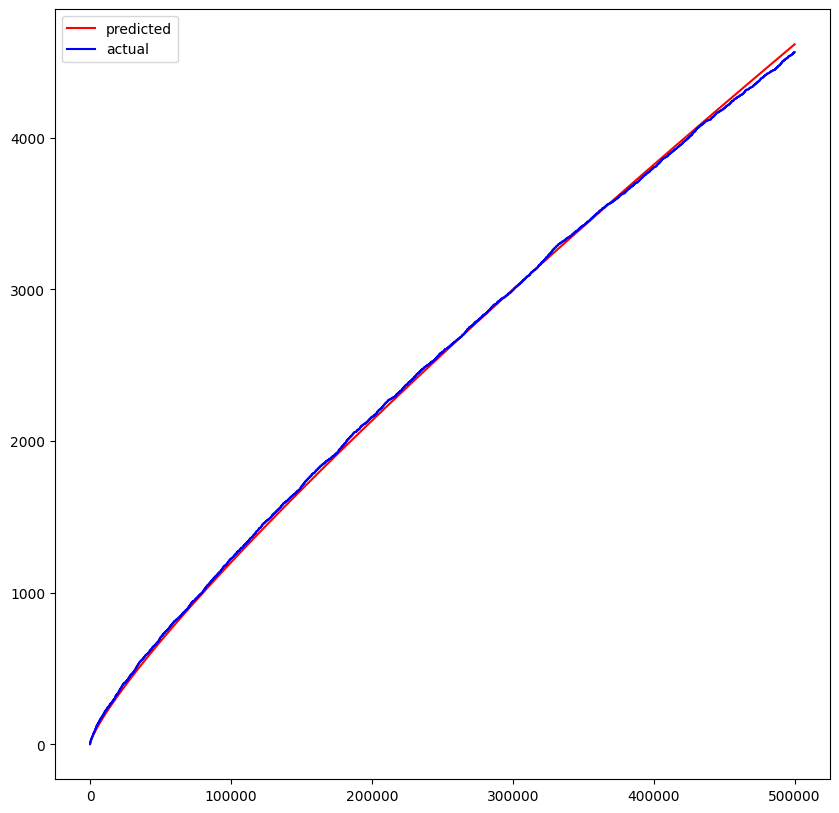

In [9]:
def func(x):
    return x / math.log(x)**2

scale = 1.59
pred_frequency = [ scale * func(i) for i in tqdm(range(2, len(frequency)+1)) ]

N = 500000

plt.figure(figsize=(10, 10))
plt.plot(pred_frequency[:N], color="red")
plt.plot(frequency[:N], color="blue")
plt.legend(["predicted", "actual"])

In [49]:
def getPrimes(n):
    prime = [True for i in range(n + 1)]
    p = 2
    while (p * p <= n):
        if (prime[p] == True):
            for i in range(p * 2, n + 1, p):
                prime[i] = False
        p += 1
    prime[0] = False
    prime[1] = False
    r = []
    for p in range(n + 1):
        if prime[p]:
            r.append(p)
    return r

In [52]:
normal = getPrimes(twins[-1])
norm_frequency = [0]*normal[-1]

for i in tqdm(range(1, len(normal))):
    for j in range(normal[i-1], normal[i]):
        norm_frequency[j] = norm_frequency[normal[i-1]-1] + 1

  0%|          | 0/1175774 [00:00<?, ?it/s]

In [58]:
norm_scale = norm_frequency[-1] / (normal[-1] / math.log(normal[-1]))
pred_norm_frequency = [ norm_scale * i / math.log(i) for i in tqdm(range(2, len(norm_frequency)+1)) ]

  0%|          | 0/18409198 [00:00<?, ?it/s]

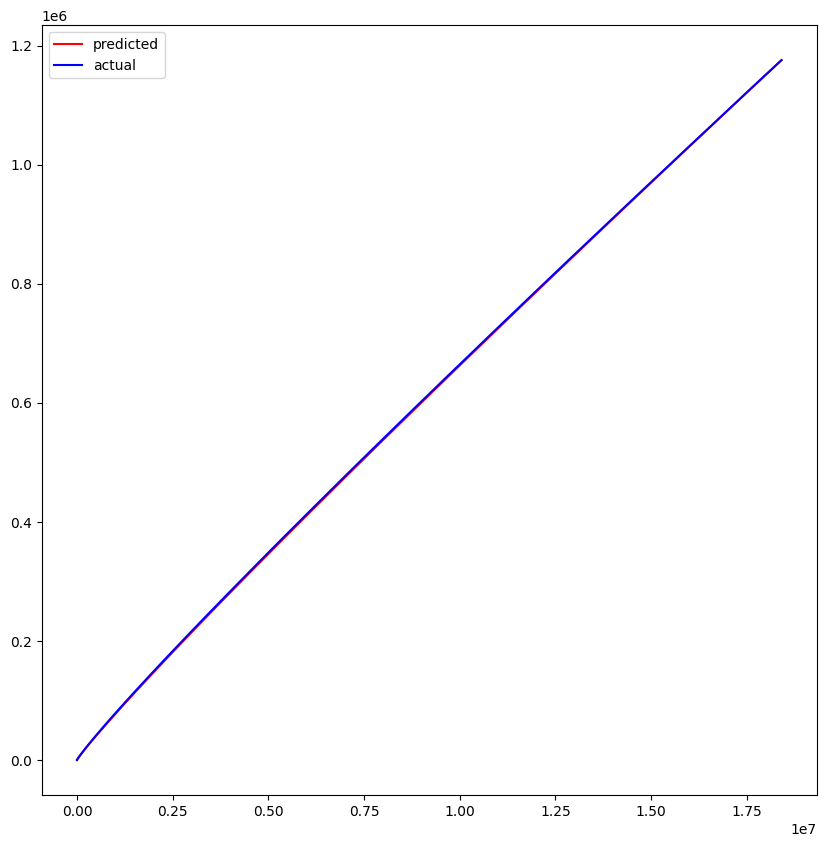

In [59]:
plt.figure(figsize=(10, 10))
plt.plot(pred_norm_frequency, color="red")
plt.plot(norm_frequency, color="blue")
plt.legend(["predicted", "actual"])